<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr13_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#stack
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(font_scale=1.3)

In [2]:
# ścieżka do pliku w sample_data
df = pd.read_csv("sample_data/mtcars_data.csv")

print(df.head())
print(df.info())


    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(

Normalizacja i podział na grupy klastrów

In [3]:

# Wybór cech do klastrowania
features = ["mpg", "hp", "wt", "disp"]   # efektywność, moc, masa, pojemność

scaler = StandardScaler() #Normalizacja wybranych cech - zbyt duży rozrzut
X_scaled = scaler.fit_transform(df[features])
#
#DataFrame z danymi do klastrowania
data = pd.DataFrame(X_scaled, columns=features, index=df.index)
#
print(data.head())

#Scatter hp - wt
fig1 = px.scatter(
    data,
    x="hp",
    y="wt",
    title="mtcars (hp - wt)-znormalizowany",
    template="plotly_dark",
    width=900,
    height=500
)
fig1.show()

#Scatter mpg - disp
fig2 = px.scatter(
    data,
    x="mpg",
    y="disp",
    title="mtcars (mpg - disp)-znormalizowany",
    template="plotly_dark",
    width=900,
    height=500
)
fig2.show()


        mpg        hp        wt      disp
0  0.153299 -0.543655 -0.620167 -0.579750
1  0.153299 -0.543655 -0.355382 -0.579750
2  0.456737 -0.795570 -0.931678 -1.006026
3  0.220730 -0.543655 -0.002336  0.223615
4 -0.234427  0.419550  0.231297  1.059772


In [4]:
from sklearn.cluster import KMeans #klasa K-średnich z sklearn

kmeans = KMeans(n_clusters=4) #4 klastrów model - przewidywanie
kmeans.fit(data)

KMeans(n_clusters=4)

In [5]:
wcss = [] #Within Cluster Sum Squares - suma kwadratów odległości od centroidów wewnątrz klastrów
for i in range(2, 10): #iteracja na ilości klastrów do reguły łokcia
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

print(wcss)

[47.55882138199432, 30.350869894139432, 21.715220167639124, 12.603685252311474, 10.504673834448964, 9.307052943501095, 7.961994655020338, 7.303474677828876]


In [6]:
wcss = pd.DataFrame(wcss, columns=['wcss']) #przygotowanie do wykreślenie reguły łokcia
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,47.558821
1,2,30.350870
2,3,21.715220
3,4,12.603685
4,5,10.504674


In [7]:
px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)',
        template='plotly_dark') #graf wcss

In [9]:
# Wybór cech do klastrowania
features = ["mpg", "hp", "wt", "disp"]   # efektywność, moc, masa, pojemność

scaler = StandardScaler() #Normalizacja wybranych cech - zbyt duży rozrzut
X_scaled = scaler.fit_transform(df[features])
kmeans = KMeans(n_clusters=4) #optymalnie 4 klastry z grafu wcss
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'hp', 'wt', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 4 klastry dla hp-wt',
           template='plotly_dark')

In [23]:
#ECHY DO KLASTROWANIA
features = ["mpg", "hp", "wt", "disp"]

#ORMALIZACJA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

#K-MEANS NA ZNORMALIZOWANYCH
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

df["cluster"] = kmeans.labels_

#CENTROIDY W JEDNOSTKACH ORYGINALNYCH
centers_scaled = kmeans.cluster_centers_
centers_orig = pd.DataFrame(
    scaler.inverse_transform(centers_scaled),
    columns=features
)

#sCATTER hp – wt W JEDNOSTKACH ODCZYTU
fig = px.scatter(
    df,
    x="hp",
    y="wt",
    color="cluster",
    width=950,
    height=500,
    title="K-means (4 klastry) — hp vs wt — centroidy w jednostkach oryginalnych",
    template="plotly_dark"
)

#RYSOWANIE CENTROIDÓW
fig.add_trace(
    go.Scatter(
        x=centers_orig["hp"],
        y=centers_orig["wt"],
        mode="markers",
        marker=dict(size=16, color="yellow", symbol="x", line=dict(width=2)),
        showlegend=False
    )
)

fig.show()


In [44]:
# Wybór cech do klastrowania
features = ["mpg", "hp", "wt", "disp"]   # efektywność, moc, masa, pojemność

scaler = StandardScaler() #Normalizacja wybranych cech - zbyt duży rozrzut
X_scaled = scaler.fit_transform(df[features])
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'mpg', 'disp', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 4 klastry',
           template='plotly_dark')

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

df["cluster"] = kmeans.labels_

centers_scaled = kmeans.cluster_centers_
centers_orig = pd.DataFrame(
    scaler.inverse_transform(centers_scaled),
    columns=features
)

# --- SCATTER mpg vs disp ---
fig = px.scatter(
    df,
    x="mpg",
    y="disp",
    color="cluster",
    width=950,
    height=500,
    title="K-means (4 klastry) — mpg vs disp — centroidy w jednostkach oryginalnych",
    template="plotly_dark"
)

# centroidy
fig.add_trace(
    go.Scatter(
        x=centers_orig["mpg"],
        y=centers_orig["disp"],
        mode="markers",
        marker=dict(size=16, color="yellow", symbol="x", line=dict(width=2)),
        showlegend=False
    )
)

fig.show()


/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



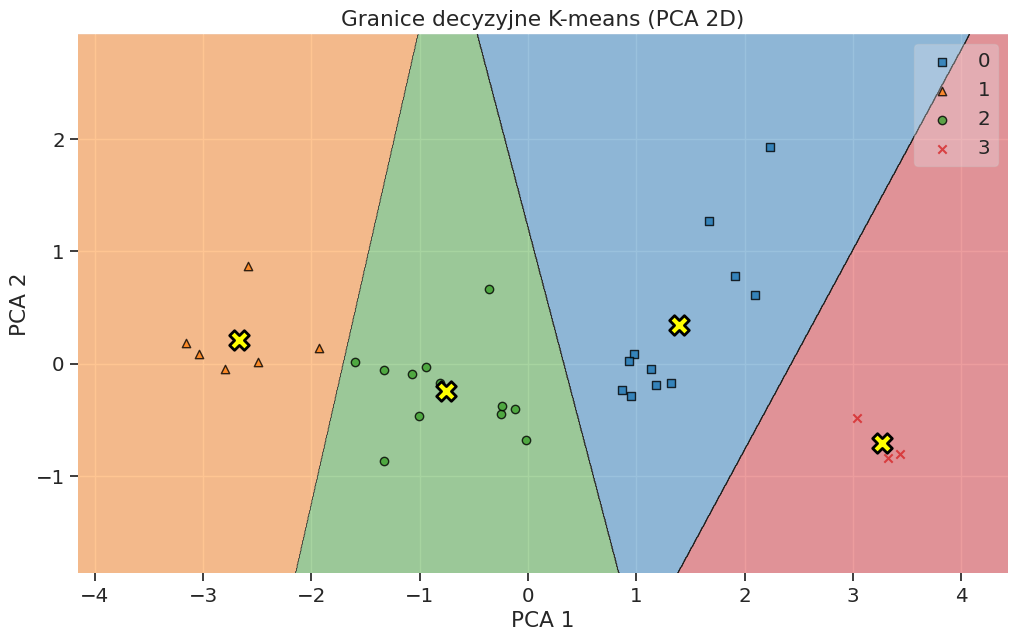

In [21]:

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#K-średnich  na PCA
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

y_kmeans = kmeans.labels_
df["cluster"] = y_kmeans

#entroidy w przestrzeni PCA
centers_pca = kmeans.cluster_centers_

#granice decyzyjne
plt.figure(figsize=(12, 7))
plt.title("Granice decyzyjne K-means (PCA 2D)")

plot_decision_regions(X_pca, y_kmeans, clf=kmeans, legend=1)

# centroidy
plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    s=200,
    marker="X",
    c="yellow",
    edgecolor="black",
    linewidth=2
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
